In [4]:
#HOURLY SOIL WATER CONTENT (SWC) TIMESERIES AT DIFF LEVELS FOR EACH OF THE 3 TIMEPERIODS
#time periods defined::
#before Fred : 8/3/21 11UTC - 8/17/21 01 UTC   (ROWS: 80376-81076)
#during Fred : 8/17/21 02 UTC - 8/18/21 09 UTC (ROWS: 81077-81141)
#after Fred : 8/18/21 10 UTC - 9/2/21 00 UTC   (ROWS: 81142-81842)

# Import Libraries
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from scipy import stats
import csv

directory = '/Users/Amanda1/Downloads'
filename = '3Fredperiods_ameriflux.csv'
file = directory + '/' + filename

# data2 = pd.read_csv(file, engine='python', skiprows=[i for i in range(1, 78817)], skipfooter=14581)
# print(type(pd.read_csv(file)))

data = np.array(pd.read_csv(file))
data[data == -9999] = np.nan

data2 = pd.read_csv(file)
data2[data2 == -9999] = np.nan

print(data2.shape)

(1420, 27)


In [5]:
#tower basic info
# h=30; #canopy height (m)
# z_tower=45.40; # tower height (m)
# z=100 #height want to calculate winds at (m)
# d=19.8; # displacement height (m)
# zo=3; # roughness length for momentum (m) #need to meausure any winds above the roughness layer (measure in constant flux layer)
# zoh=3; #roughness length for heat (m)     #so, measure above 25m to be safe

In [38]:
## Get variables

SWC_1_1 = data2['SWC_1_1_1'] # -0.057 m # volumetric soil water content (% out of 100%) at shallowest soil layer
SWC_1_2 = data2['SWC_1_2_1'] #-0.157 m # volumetric soil water content (% out of 100%) at midway soil layer
SWC_1_3 = data2['SWC_1_3_1'] # -0.257 m # volumetric soil water content (% out of 100%) at deepest soil layer
SWC_3_1 = data2['SWC_3_1_1'] # - 0.063 m
SWC_3_2 = data2['SWC_3_2_1'] #-0.163 m
SWC_3_3 = data2['SWC_3_3_1'] # -0.263 m
SWC_4_1 = data2['SWC_4_1_1'] #-0.055 m
SWC_4_2 = data2['SWC_4_2_1'] # -0.155 m
SWC_4_3 = data2['SWC_4_3_1'] # -0.255 m
SWC_5_1 = data2['SWC_5_1_1'] # -0.065 m
SWC_5_2 = data2['SWC_5_2_1'] # -0.165 m
SWC_5_3 = data2['SWC_5_3_1'] # -0.265 m
SWC_5_4 = data2['SWC_5_4_1'] # -0.365 m
SWC_5_5 = data2['SWC_5_5_1'] # -0.465 m
SWC_5_6 = data2['SWC_5_6_1'] # -0.565 m
SWC_5_7 = data2['SWC_5_7_1'] # -0.665 m
SWC_5_8 = data2['SWC_5_8_1'] # -0.865 m

timestamp = data2['TIMESTAMP_START']
timestamp=timestamp.to_numpy()
timestart=data2['TIMESTAMP_START']
#convert to HOURLY data
n=2 #data is half hourly, so the number of times in 1 hr is 2


SWC1 = np.array(SWC_1_1)
SWC2 = np.array(SWC_1_2)
SWC3 = np.array(SWC_1_3)
SWC4 = np.array(SWC_3_1)
SWC5 = np.array(SWC_3_2)
SWC6 = np.array(SWC_3_3)
SWC7 = np.array(SWC_4_1)
SWC8 = np.array(SWC_4_2)
SWC9= np.array(SWC_4_3)
SWC10= np.array(SWC_5_1)
SWC11=np.array(SWC_5_2)
SWC12=np.array(SWC_5_3)
SWC13=np.array(SWC_5_4)
SWC14=np.array(SWC_5_5)
SWC15=np.array(SWC_5_6)
SWC16 = np.array(SWC_5_7)
SWC17 = np.array(SWC_5_8)

#precip = np.nanmean(p.reshape(-1,n),axis=1)

swc_1_1 = np.nanmean(SWC1.reshape(-1,n),axis=1)
swc_1_2 = np.nanmean(SWC2.reshape(-1,n),axis=1)
swc_1_3 = np.nanmean(SWC3.reshape(-1,n),axis=1)
swc_3_1 = np.nanmean(SWC4.reshape(-1,n),axis=1)
swc_3_2 = np.nanmean(SWC5.reshape(-1,n),axis=1)
swc_3_3 = np.nanmean(SWC6.reshape(-1,n),axis=1)
swc_4_1 = np.nanmean(SWC7.reshape(-1,n),axis=1)
swc_4_2 = np.nanmean(SWC8.reshape(-1,n),axis=1)
swc_4_3 = np.nanmean(SWC9.reshape(-1,n),axis=1)
swc_5_1 = np.nanmean(SWC10.reshape(-1,n),axis=1)
swc_5_2= np.nanmean(SWC11.reshape(-1,n),axis=1)
swc_5_3 = np.nanmean(SWC12.reshape(-1,n),axis=1)
swc_5_4 = np.nanmean(SWC13.reshape(-1,n),axis=1)
swc_5_5 = np.nanmean(SWC14.reshape(-1,n),axis=1)
swc_5_6 =np.nanmean(SWC15.reshape(-1,n),axis=1)
swc_5_7 = np.nanmean(SWC16.reshape(-1,n),axis=1)
swc_5_8 = np.nanmean(SWC17.reshape(-1,n),axis=1)


#G = np.nanmean(G.reshape(-1,n),axis=1)

dates_before=timestart[::2]

print(np.nanmax(swc_3_2))
print(np.nanmin(swc_3_2))
print(np.shape(swc_3_2))

39.77
29.67
(710,)


/var/folders/v5/mtg4s0dn3gqbfbcczms2k6680000gn/T/ipykernel_9151/2498414473.py:48: RuntimeWarning: Mean of empty slice
  swc_1_1 = np.nanmean(SWC1.reshape(-1,n),axis=1)
/var/folders/v5/mtg4s0dn3gqbfbcczms2k6680000gn/T/ipykernel_9151/2498414473.py:49: RuntimeWarning: Mean of empty slice
  swc_1_2 = np.nanmean(SWC2.reshape(-1,n),axis=1)
/var/folders/v5/mtg4s0dn3gqbfbcczms2k6680000gn/T/ipykernel_9151/2498414473.py:50: RuntimeWarning: Mean of empty slice
  swc_1_3 = np.nanmean(SWC3.reshape(-1,n),axis=1)
/var/folders/v5/mtg4s0dn3gqbfbcczms2k6680000gn/T/ipykernel_9151/2498414473.py:51: RuntimeWarning: Mean of empty slice
  swc_3_1 = np.nanmean(SWC4.reshape(-1,n),axis=1)
/var/folders/v5/mtg4s0dn3gqbfbcczms2k6680000gn/T/ipykernel_9151/2498414473.py:52: RuntimeWarning: Mean of empty slice
  swc_3_2 = np.nanmean(SWC5.reshape(-1,n),axis=1)
/var/folders/v5/mtg4s0dn3gqbfbcczms2k6680000gn/T/ipykernel_9151/2498414473.py:53: RuntimeWarning: Mean of empty slice
  swc_3_3 = np.nanmean(SWC6.reshape(-1,n),

In [8]:
# fig, ax = plt.subplots()
# fig.set_size_inches(16, 8)
# ax.plot(dates_before.astype(str),precip)
# ax.set_xlabel('Time',fontsize=14)
# ax.set_ylim(0,12)
# #ax.set_xlim(0,750)
# ax.set_ylabel('Rainfall (mm)',fontsize=14)
# ax.set_title('Hourly Precipitation Before, During, and After TS Fred Impact',fontsize=14)
# plt.xticks(rotation=50)  # rotate x-axis tick labels by 45 degrees
# # num_ticks = 10
# # tick_positions = np.linspace(0, len(dates_before)-1, num=num_ticks, dtype=int)
# # tick_labels = dates_before[tick_positions].astype(str)
# # plt.xticks(tick_positions, tick_labels, rotation=45)
# ax.xaxis.set_major_locator(plt.MaxNLocator(52))
# ax.axvline(x=327, color='red', linestyle='--') #this line is where "before" fred ends, which is xvalue 654 in speadsheet/2
# ax.axvline(x=359, color='blue', linestyle='--') #this line is where "during" fred ends= 718/2 (since every hr or 2 rows)
# plt.grid()
# plt.show()

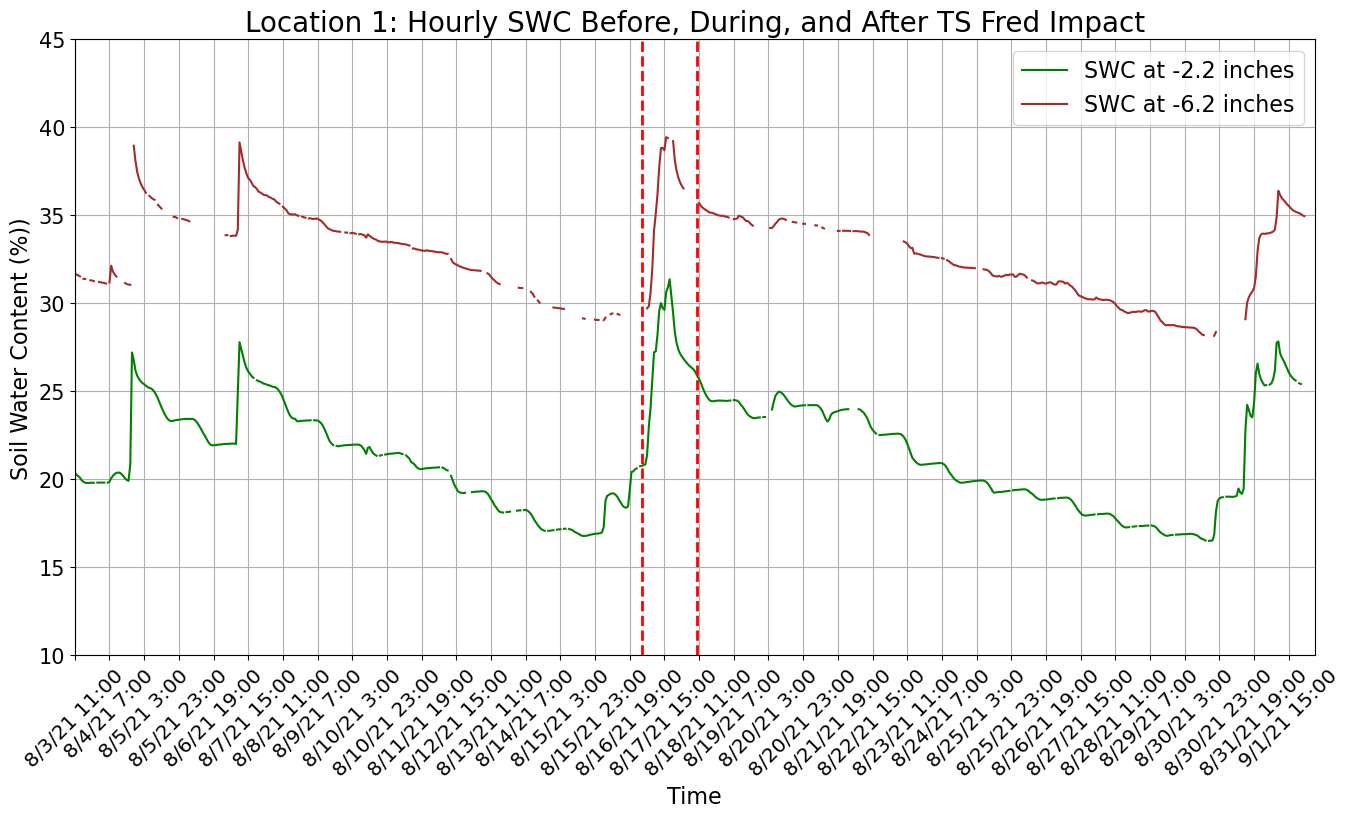

In [60]:
#SWC profile 1 (location 1)
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
ax.plot(dates_before.astype(str),swc_1_1,color='green',label= 'SWC at -2.2 inches' )
ax.plot(dates_before.astype(str),swc_1_2,color='brown',label='SWC at -6.2 inches')
#ax.plot(dates_before.astype(str),swc3,color='blue')
ax.set_xlabel('Time',fontsize=16)
ax.set_ylim(10,45)
ax.set_xlim(0,715)
#ax.set_xlim(0,750)
ax.set_ylabel('Soil Water Content (%))',fontsize=16)
ax.set_title('Location 1: Hourly SWC Before, During, and After TS Fred Impact',fontsize=20)
plt.xticks(rotation=45,fontsize=14.5)  # rotate x-axis tick labels by 45 degrees
plt.yticks(fontsize=15)
# num_ticks = 10
# tick_positions = np.linspace(0, len(dates_before)-1, num=num_ticks, dtype=int)
# tick_labels = dates_before[tick_positions].astype(str)
# plt.xticks(tick_positions, tick_labels, rotation=45)

ax.xaxis.set_major_locator(plt.MaxNLocator(45))
ax.axvline(x=327, color='red', linestyle='--',linewidth=2) #this line is where "before" fred ends, which is xvalue 654 in speadsheet/2
ax.axvline(x=359, color='red', linestyle='--',linewidth=2) #this line is where "during" fred ends= 718/2 (since every hr or 2 rows)
plt.grid()
plt.legend(fontsize =16)
plt.show()

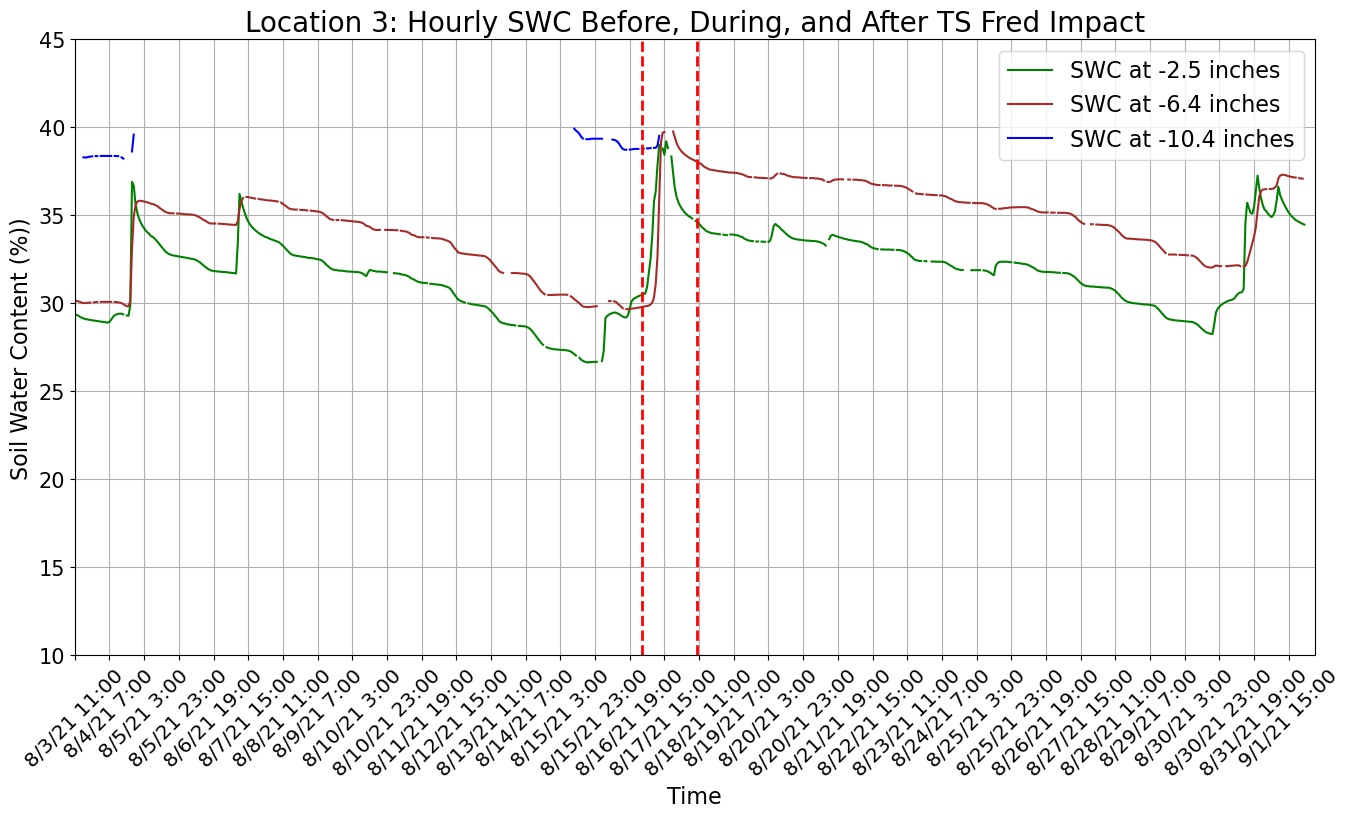

In [61]:
#SWC profile 3 (location 3) (no data for location 2)
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
ax.plot(dates_before.astype(str),swc_3_1,color='green',label= 'SWC at -2.5 inches' )
ax.plot(dates_before.astype(str),swc_3_2,color='brown',label='SWC at -6.4 inches')
ax.plot(dates_before.astype(str),swc_3_3,color='blue',label='SWC at -10.4 inches')
#ax.plot(dates_before.astype(str),swc3,color='blue')
ax.set_xlabel('Time',fontsize=16)
ax.set_ylim(10,45)
ax.set_xlim(0,715)
#ax.set_xlim(0,750)
ax.set_ylabel('Soil Water Content (%))',fontsize=16)
ax.set_title('Location 3: Hourly SWC Before, During, and After TS Fred Impact',fontsize=20)
plt.xticks(rotation=45,fontsize=14.5)  # rotate x-axis tick labels by 45 degrees
plt.yticks(fontsize=15)
# num_ticks = 10
# tick_positions = np.linspace(0, len(dates_before)-1, num=num_ticks, dtype=int)
# tick_labels = dates_before[tick_positions].astype(str)
# plt.xticks(tick_positions, tick_labels, rotation=45)

ax.xaxis.set_major_locator(plt.MaxNLocator(45))
ax.axvline(x=327, color='red', linestyle='--',linewidth=2) #this line is where "before" fred ends, which is xvalue 654 in speadsheet/2
ax.axvline(x=359, color='red', linestyle='--',linewidth=2) #this line is where "during" fred ends= 718/2 (since every hr or 2 rows)
plt.grid()
plt.legend(fontsize =16)
plt.show()

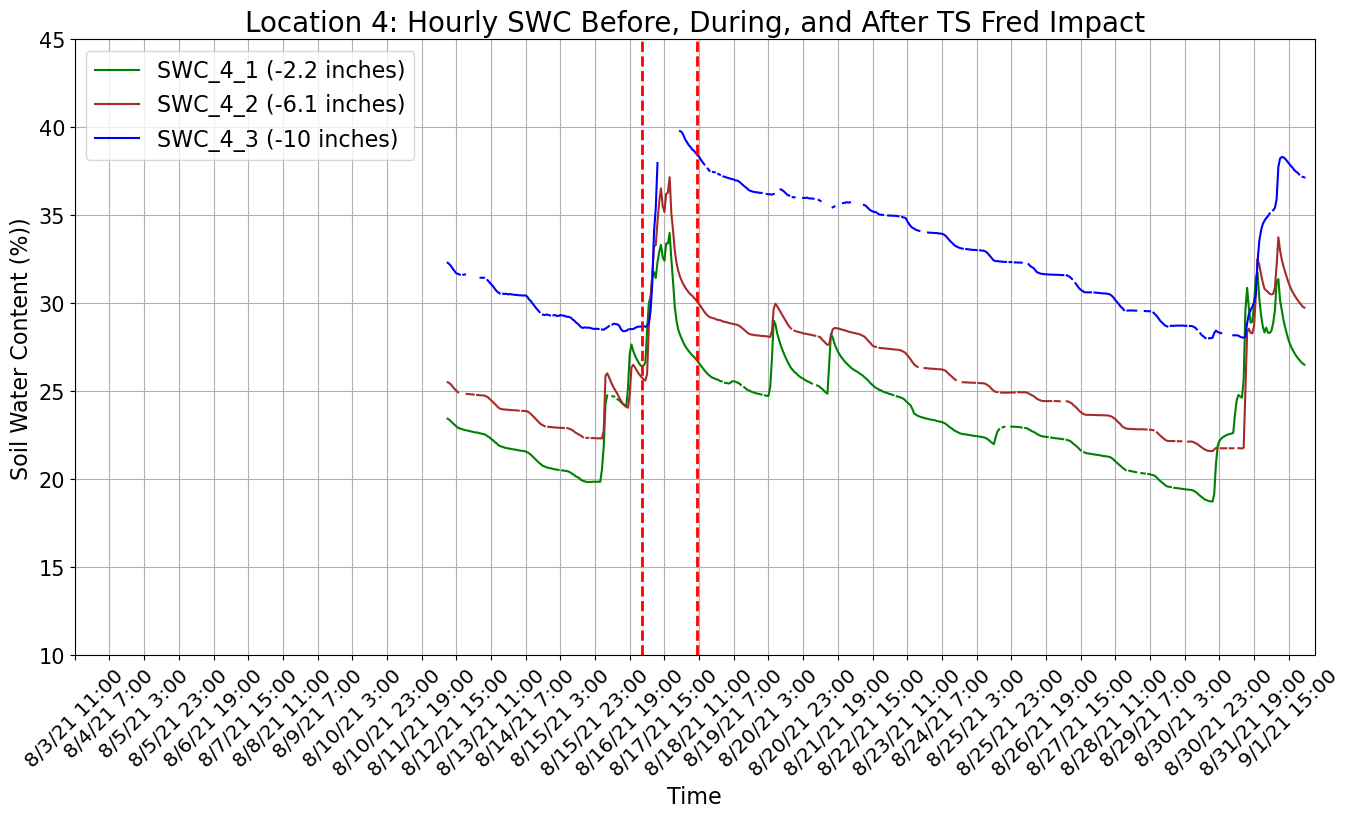

In [62]:
#SWC profile 4 (location 4) 
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
ax.plot(dates_before.astype(str),swc_4_1,color='green',label='SWC_4_1 (-2.2 inches)')
ax.plot(dates_before.astype(str),swc_4_2,color='brown',label='SWC_4_2 (-6.1 inches)')
ax.plot(dates_before.astype(str),swc_4_3,color='blue',label='SWC_4_3 (-10 inches)')
#ax.plot(dates_before.astype(str),swc3,color='blue')
ax.set_xlabel('Time',fontsize=16)
ax.set_ylim(10,45)
ax.set_xlim(0,715)
#ax.set_xlim(0,750)
ax.set_ylabel('Soil Water Content (%))',fontsize=16)
ax.set_title('Location 4: Hourly SWC Before, During, and After TS Fred Impact',fontsize=20)
plt.xticks(rotation=45,fontsize=14.5)  # rotate x-axis tick labels by 45 degrees
plt.yticks(fontsize=15)
# num_ticks = 10
# tick_positions = np.linspace(0, len(dates_before)-1, num=num_ticks, dtype=int)
# tick_labels = dates_before[tick_positions].astype(str)
# plt.xticks(tick_positions, tick_labels, rotation=45)

ax.xaxis.set_major_locator(plt.MaxNLocator(45))
ax.axvline(x=327, color='red', linestyle='--',linewidth=2) #this line is where "before" fred ends, which is xvalue 654 in speadsheet/2
ax.axvline(x=359, color='red', linestyle='--',linewidth=2) #this line is where "during" fred ends= 718/2 (since every hr or 2 rows)
plt.grid()
plt.legend(fontsize =16)
plt.show()

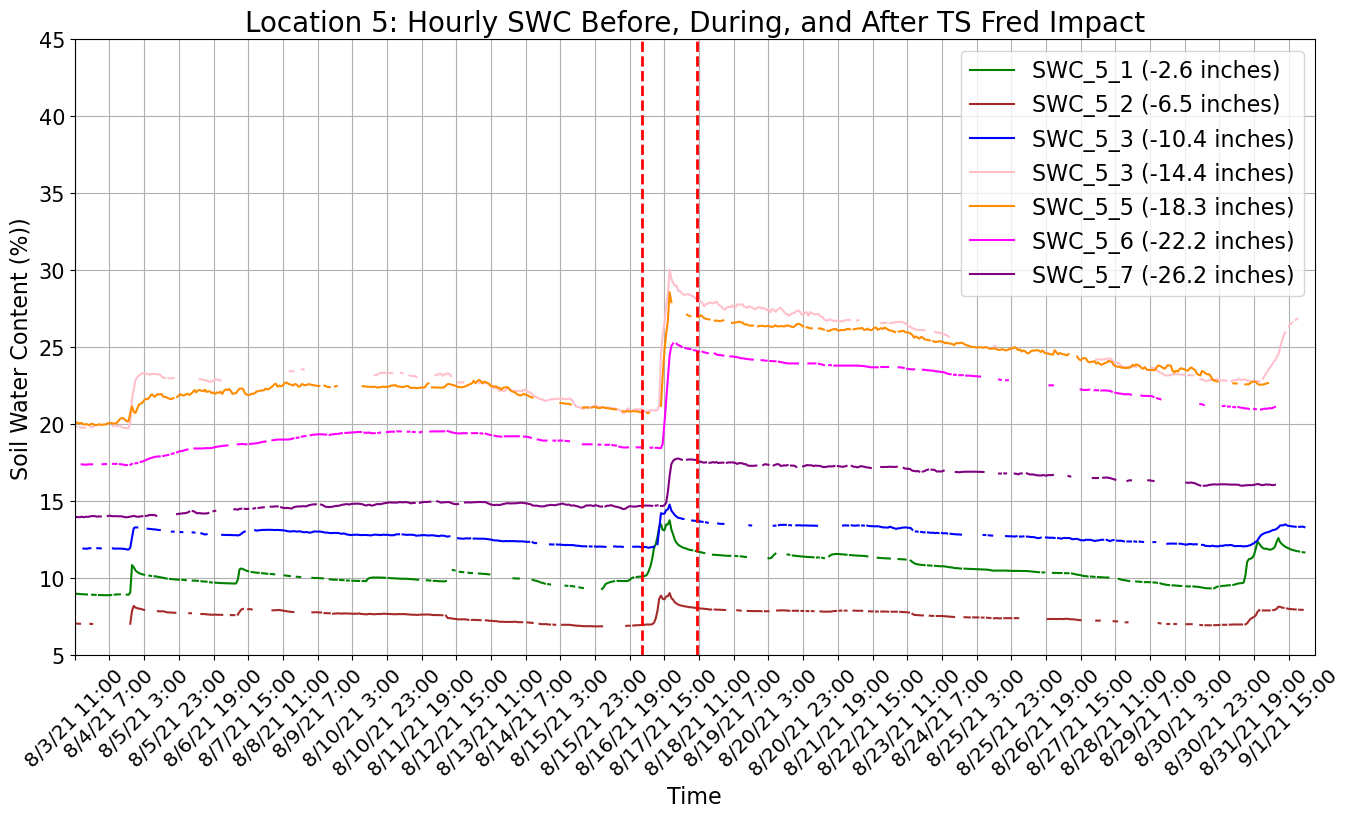

In [66]:
#SWC profile 5 (location 5) 
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
ax.plot(dates_before.astype(str),swc_5_1,color='green',label='SWC_5_1 (-2.6 inches)')
ax.plot(dates_before.astype(str),swc_5_2,color='brown',label='SWC_5_2 (-6.5 inches)')
ax.plot(dates_before.astype(str),swc_5_3,color='blue',label='SWC_5_3 (-10.4 inches)')
ax.plot(dates_before.astype(str),swc_5_4,color='pink',label='SWC_5_3 (-14.4 inches)')
ax.plot(dates_before.astype(str),swc_5_5,color='darkorange',label='SWC_5_5 (-18.3 inches)')
ax.plot(dates_before.astype(str),swc_5_6,color='magenta',label='SWC_5_6 (-22.2 inches)')
ax.plot(dates_before.astype(str),swc_5_7,color='purple',label='SWC_5_7 (-26.2 inches)')
#ax.plot(dates_before.astype(str),swc_5_8,color='black',label='SWC_5_8 (-34.1 inches)')
#ax.plot(dates_before.astype(str),swc3,color='blue')
ax.set_xlabel('Time',fontsize=16)
ax.set_ylim(5,45)
ax.set_xlim(0,715)
#ax.set_xlim(0,750)
ax.set_ylabel('Soil Water Content (%))',fontsize=16)
ax.set_title('Location 5: Hourly SWC Before, During, and After TS Fred Impact',fontsize=20)
plt.xticks(rotation=45,fontsize=14.5)  # rotate x-axis tick labels by 45 degrees
plt.yticks(fontsize=15)
# num_ticks = 10
# tick_positions = np.linspace(0, len(dates_before)-1, num=num_ticks, dtype=int)
# tick_labels = dates_before[tick_positions].astype(str)
# plt.xticks(tick_positions, tick_labels, rotation=45)

ax.xaxis.set_major_locator(plt.MaxNLocator(45))
ax.axvline(x=327, color='red', linestyle='--',linewidth=2) #this line is where "before" fred ends, which is xvalue 654 in speadsheet/2
ax.axvline(x=359, color='red', linestyle='--',linewidth=2) #this line is where "during" fred ends= 718/2 (since every hr or 2 rows)
plt.grid()
plt.legend(fontsize =16)
plt.show()

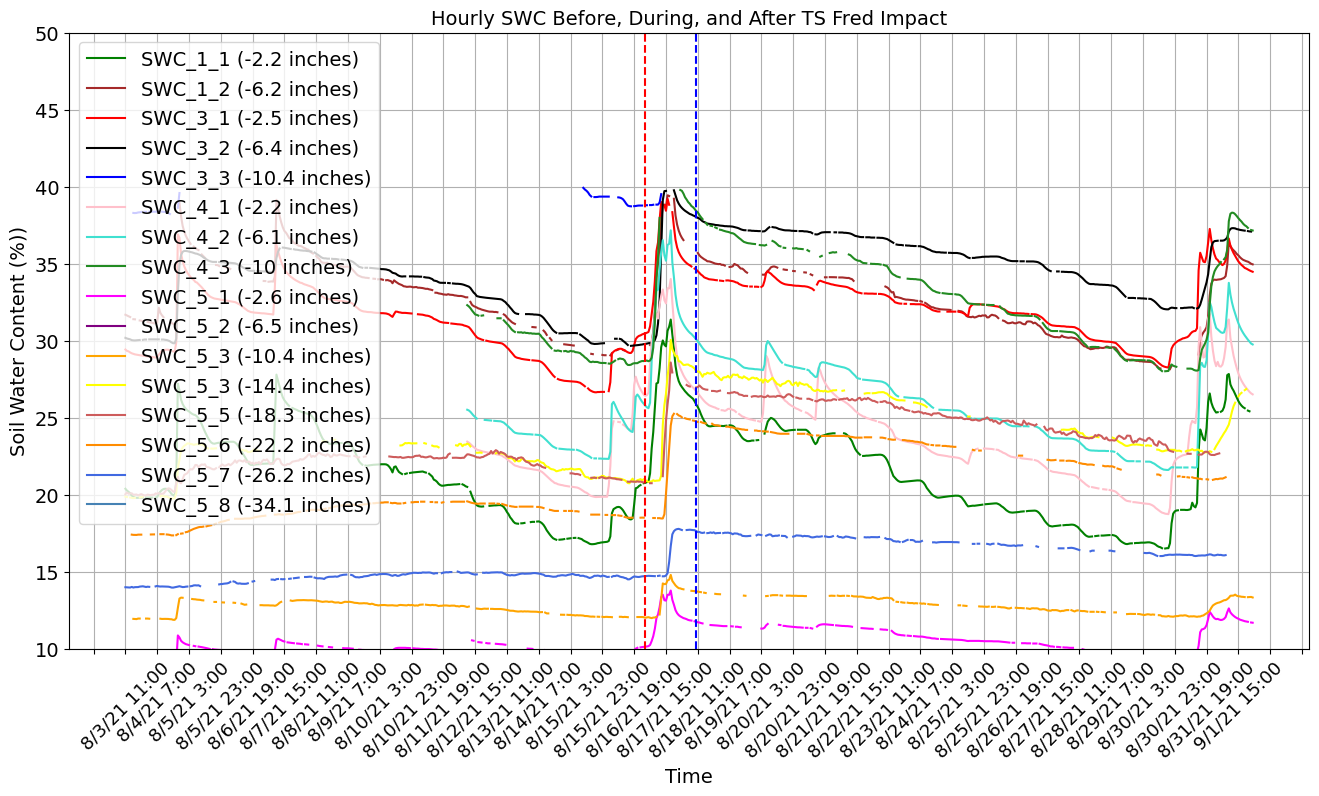

In [28]:
#SWC profiles for ALL locations (easier to analyze all on one plot)
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
ax.plot(dates_before.astype(str),swc_1_1,color='green',label= 'SWC_1_1 (-2.2 inches)' )
ax.plot(dates_before.astype(str),swc_1_2,color='brown',label='SWC_1_2 (-6.2 inches)')
ax.plot(dates_before.astype(str),swc_3_1,color='red',label= 'SWC_3_1 (-2.5 inches)' )
ax.plot(dates_before.astype(str),swc_3_2,color='black',label='SWC_3_2 (-6.4 inches)')
ax.plot(dates_before.astype(str),swc_3_3,color='blue',label='SWC_3_3 (-10.4 inches)')
ax.plot(dates_before.astype(str),swc_4_1,color='pink',label='SWC_4_1 (-2.2 inches)')
ax.plot(dates_before.astype(str),swc_4_2,color='turquoise',label='SWC_4_2 (-6.1 inches)')
ax.plot(dates_before.astype(str),swc_4_3,color='forestgreen',label='SWC_4_3 (-10 inches)')
ax.plot(dates_before.astype(str),swc_5_1,color='magenta',label='SWC_5_1 (-2.6 inches)')
ax.plot(dates_before.astype(str),swc_5_2,color='purple',label='SWC_5_2 (-6.5 inches)')
ax.plot(dates_before.astype(str),swc_5_3,color='orange',label='SWC_5_3 (-10.4 inches)')
ax.plot(dates_before.astype(str),swc_5_4,color='yellow',label='SWC_5_3 (-14.4 inches)')
ax.plot(dates_before.astype(str),swc_5_5,color='indianred',label='SWC_5_5 (-18.3 inches)')
ax.plot(dates_before.astype(str),swc_5_6,color='darkorange',label='SWC_5_6 (-22.2 inches)')
ax.plot(dates_before.astype(str),swc_5_7,color='royalblue',label='SWC_5_7 (-26.2 inches)')
ax.plot(dates_before.astype(str),swc_5_8,color='steelblue',label='SWC_5_8 (-34.1 inches)')


#ax.plot(dates_before.astype(str),swc3,color='blue')
ax.set_xlabel('Time',fontsize=14)
ax.set_ylim(10,50)
#ax.set_xlim(0,750)
ax.set_ylabel('Soil Water Content (%))',fontsize=14)
ax.set_title('Hourly SWC Before, During, and After TS Fred Impact',fontsize=14)
plt.xticks(rotation=45,fontsize=13)  # rotate x-axis tick labels by 45 degrees
plt.yticks(fontsize=14)
# num_ticks = 10
# tick_positions = np.linspace(0, len(dates_before)-1, num=num_ticks, dtype=int)
# tick_labels = dates_before[tick_positions].astype(str)
# plt.xticks(tick_positions, tick_labels, rotation=45)

ax.xaxis.set_major_locator(plt.MaxNLocator(45))
ax.axvline(x=327, color='red', linestyle='--') #this line is where "before" fred ends, which is xvalue 654 in speadsheet/2
ax.axvline(x=359, color='blue', linestyle='--') #this line is where "during" fred ends= 718/2 (since every hr or 2 rows)
plt.grid()
plt.legend(fontsize =14)
plt.show()

In [ ]:
# fig, ax = plt.subplots()
# fig.set_size_inches(16, 8)
# ax.plot(dates_before.astype(str),G)
# ax.set_xlabel('Time',fontsize=14)
# ax.set_ylim(-10,30)
# #ax.set_xlim(0,750)
# ax.set_ylabel('Ground Heat Flux (W/m^2))',fontsize=14)
# ax.set_title('Hourly Ground Heat Flux Before, During, and After TS Fred Impact',fontsize=14)
# plt.xticks(rotation=50)  # rotate x-axis tick labels by 45 degrees
# # num_ticks = 10
# # tick_positions = np.linspace(0, len(dates_before)-1, num=num_ticks, dtype=int)
# # tick_labels = dates_before[tick_positions].astype(str)
# # plt.xticks(tick_positions, tick_labels, rotation=45)
# ax.xaxis.set_major_locator(plt.MaxNLocator(52))
# ax.axvline(x=327, color='red', linestyle='--') #this line is where "before" fred ends, which is xvalue 654 in speadsheet/2
# ax.axvline(x=359, color='blue', linestyle='--') #this line is where "during" fred ends= 718/2 (since every hr or 2 rows)
# plt.grid()
# plt.show()